In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [2]:
# data gathering
all_data = pd.read_csv('../dataset/AUS_Classification.csv', sep=',', encoding='utf-8')
label = all_data['DEP_DEL15']
all_data = all_data.drop(['DEP_DEL15'], axis=1)
all_data = all_data.drop(['DEP_DELAY'], axis=1)
all_data = all_data.drop(['DEP_TIME'], axis=1)
all_data = all_data.drop(['DEP_DELAY_GROUP'], axis=1)
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data = all_data.drop(['ARR_DEL15'], axis=1)
all_data = all_data.drop(['ARR_DELAY'], axis=1)
all_data = all_data.drop(['ARR_TIME'], axis=1)
all_data = all_data.drop(['ARR_DELAY_GROUP'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(all_data, label, test_size=0.25, random_state=42)

Accuracy: 0.9110374361099599
[1. 0. 1. ... 0. 0. 0.]


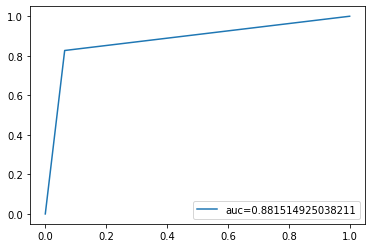

[[15644  1064]
 [  868  4141]]
[0.02221702 0.05993799 0.02827957 0.00525332 0.01742065 0.
 0.00559287 0.01918591 0.01634903 0.0181925  0.06514859 0.00594042
 0.00113032 0.2204042  0.01757101 0.02513211 0.00312636 0.46911812]
['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'MKT_CARRIER_AIRLINE_ID'
 'OP_CARRIER_FL_NUM' 'ORIGIN_AIRPORT_SEQ_ID' 'DEST_AIRPORT_SEQ_ID'
 'CRS_DEP_TIME' 'CRS_ARR_TIME' 'CRS_ELAPSED_TIME' 'ACTUAL_ELAPSED_TIME'
 'DISTANCE' 'DISTANCE_GROUP' 'CARRIER_DELAY' 'WEATHER_DELAY' 'NAS_DELAY'
 'SECURITY_DELAY' 'LATE_AIRCRAFT_DELAY']


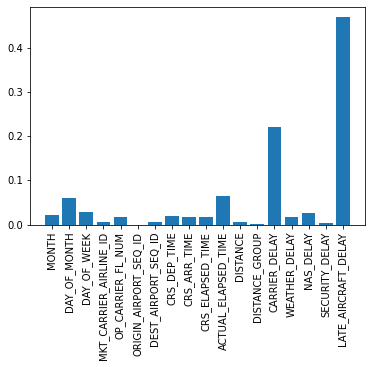

In [10]:
# Trees

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.feature_importances_)
print(clf.feature_names_in_)

plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7712851683013308
[0.26003851 0.12140226 0.20250295 ... 0.12343414 0.2315364  0.26668281]


C:\Users\neele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


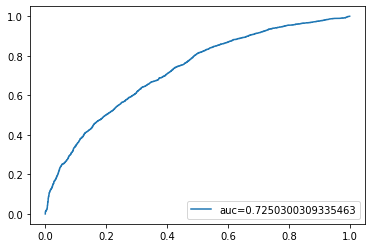

[[16640    68]
 [ 4899   110]]
[[ 1.35284802e-05 -1.46743402e-06  1.54498805e-05 -5.56136663e-04
   3.15830937e-05  8.46629670e-06 -2.34474020e-07  1.14618976e-03
  -3.43018202e-04 -3.92866722e-05 -8.26120429e-06  1.18423642e-04
  -2.79008680e-06  2.10677854e-03  1.97343159e-04  3.89104728e-04
   1.85092679e-05  2.53569333e-03]]
['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'MKT_CARRIER_AIRLINE_ID'
 'OP_CARRIER_FL_NUM' 'ORIGIN_AIRPORT_SEQ_ID' 'DEST_AIRPORT_SEQ_ID'
 'CRS_DEP_TIME' 'CRS_ARR_TIME' 'CRS_ELAPSED_TIME' 'ACTUAL_ELAPSED_TIME'
 'DISTANCE' 'DISTANCE_GROUP' 'CARRIER_DELAY' 'WEATHER_DELAY' 'NAS_DELAY'
 'SECURITY_DELAY' 'LATE_AIRCRAFT_DELAY']


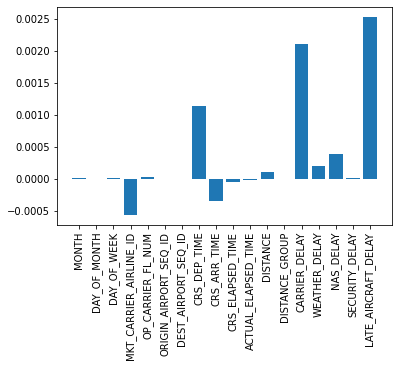

In [11]:
# Logistic Regression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.coef_)
print(clf.feature_names_in_)
plt.bar(clf.feature_names_in_, clf.coef_[0])
plt.xticks(rotation=90)
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.8706543261039739
[1. 0. 1. ... 0. 0. 0.]


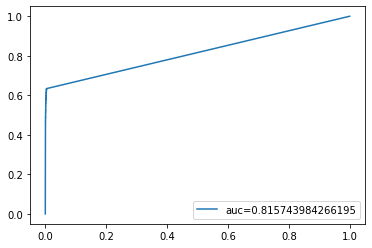

[[16699     9]
 [ 2800  2209]]
{'alpha': 0.01}
[array([[-5.59817176e-165, -3.67991965e-316, -2.80724444e-317, ...,
        -1.54171213e-316, -4.84047564e-261,  6.55330629e-152],
       [ 4.91847404e-126, -7.53647637e-317, -4.44550066e-316, ...,
         3.07952500e-316, -7.06426500e-222, -7.34911160e-115],
       [-3.28643605e-189, -1.61472002e-316,  2.19861520e-316, ...,
         3.86716179e-316,  1.39197887e-283, -1.00346870e-176],
       ...,
       [ 8.11015303e-209,  2.92808687e-316, -2.21109791e-316, ...,
        -3.41066307e-316, -1.62847387e-289,  8.38191302e-193],
       [-1.47949020e-316,  4.32709017e-316,  5.05404606e-316, ...,
        -1.31587873e-316, -5.40979941e-316, -1.30129351e-308],
       [-7.84340569e-139, -3.47682300e-316, -2.98541172e-316, ...,
        -2.56158789e-316,  1.41975907e-219, -1.57431040e-126]]), array([[-1.87219021e-004],
       [-3.20532536e-307],
       [-3.17134859e-317],
       [ 3.51590448e-316],
       [ 1.07703149e-317],
       [ 1.56509068e-00

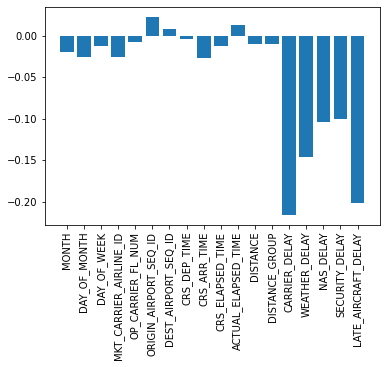

In [6]:
# MLP

# clf = MLPClassifier(random_state=42).fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# print(y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# auc = roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

# print(confusion_matrix(y_test, y_pred))
# print(clf.coefs_)
# print(clf.n_layers_)
# print(clf.feature_names_in_)
# plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
# plt.xticks(rotation=90)
# plt.show()

parameters={
'alpha': [0.01, 0.05, 0.1, 0.5, 1],
}

clf = GridSearchCV(estimator=MLPClassifier(random_state=42),param_grid=parameters,n_jobs=-1,verbose=2,cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.best_params_)
print(clf.best_estimator_.coefs_)
print(clf.best_estimator_.n_layers_)
print(clf.best_estimator_.feature_names_in_)
plt.bar(clf.best_estimator_.feature_names_in_, clf.best_estimator_.coefs_[0].mean(axis=1))
plt.xticks(rotation=90)
plt.show()

In [19]:
# CatBoost

model = CatBoostClassifier(random_seed=42, loss_function='Logloss', eval_metric='AUC', silent=True)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
        'l2_leaf_reg': [0.001, 0.01, 0.1, 1, 10],
        'depth': [2, 4, 6, 8, 10]}
grid_search_result = model.grid_search(grid,
                                       X=X_train, 
                                       y=y_train,
                                       cv=3,
                                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9322925532
bestIteration = 999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9322926	best: 0.9322926 (0)	total: 16.2s	remaining: 33m 22s

bestTest = 0.9504724354
bestIteration = 999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9504724	best: 0.9504724 (1)	total: 29.3s	remaining: 30m 5s

bestTest = 0.954757663
bestIteration = 983

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9547577	best: 0.9547577 (2)	total: 43.4s	remaining: 29m 26s

bestTest = 0.9574860584
bestIteration = 529

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.9574861	best: 0.9574861 (3)	total: 57.9s	remaining: 29m 10

KeyboardInterrupt: 